### **Overview**
We know that k-NN can be used in addressing regressing problems.

In this notebook, we will demonstrate the use of **k-NN in regression** setup with **California housing dataset**, where we try to predict price of a house based on its features.

### **Imports**

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()

from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler ,PolynomialFeatures 
from sklearn.pipeline import Pipeline ,make_pipeline 
from sklearn.metrics import mean_squared_error 

from sklearn.model_selection import train_test_split ,GridSearchCV ,RandomizedSearchCV

### **STEP 1 : Training Data**



#### **Loading the dataset**

This dataset can be fetched from sklearn with `fetch_california_housing` API.

In [2]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)

Lets check the shape of feature matrix and label vector.

In [3]:
print('Shape of feature matrix : ' ,X.shape)
print('Shape of label vector : ',y.shape)

Shape of feature matrix :  (20640, 8)
Shape of label vector :  (20640,)


Perform quick sanity check to make sure  we have same number of rows in the feature matrix as well as the label vector.

In [5]:
assert(X.shape[0] == y.shape[0])

#### **Split data into train & test sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=8) 

In [8]:
print('Shape of training feature matrix : ' ,X_train.shape)
print('Shape of training label vector : ',y_train.shape)
print()
print('Shape of test feature matrix : ' ,X_test.shape)
print('Shape of test label vector : ',y_test.shape)

Shape of training feature matrix :  (14448, 8)
Shape of training label vector :  (14448,)

Shape of test feature matrix :  (6192, 8)
Shape of test label vector :  (6192,)


In [7]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

#### **Preprocessing the dataset**

We have explored California housing set in detail earlier in the course 

In order to refresh your memory, we have bargraphs corresponding to all the features and the output label plotted here.

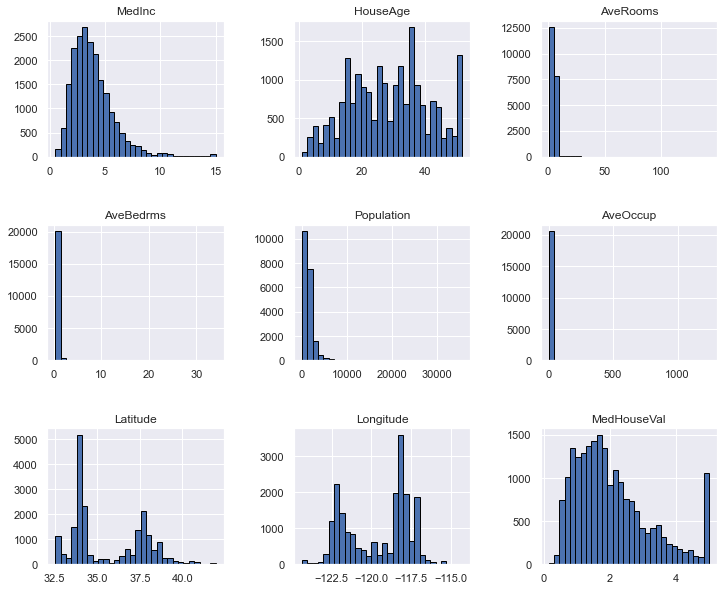

In [11]:
california_housing = fetch_california_housing(as_frame=True)

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

**Observe that :**

* The features are on a different scale and we need to bring them on the same scale for k-NN. 

* k-NN uses Euclidean distance computation to identify the nearest neighbors to identify the nearest neighbors and it is crucial to have all the features on the same scale for that. 

* If all the features are not on the same scale, the feature with wider variance would dominate the distance calculation.

### **STEP 2 : Model Building**

We instantiate a `pipeline` object with two stages; 

* The first stage performs feature scaling with `MinMaxScaler`.

* And the second stage performs k-NN regressor with `n_neighbors=2`. In short, we are using 2-NN that is we use the price of the two nearest houses in feature space to decide the price of the new house.

* The model is trained with feature matrix and label vector from training set.

* After the model is trained, it is evaluated with the test set using the `mean squared error` metric.


In [12]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('knn', KNeighborsRegressor(n_neighbors=2))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=2))])

In [13]:
y_pred = pipe.predict(X_test)

error = mean_squared_error(y_test, y_pred, squared=False)
print(error)

0.6767822465759739


### **STEP 3: Model Selection and Evaluation** 

k-NN classifier has $k$, the number of neighbors, as a hyperparameter.

There are a couple of ways to tune the hyper-parameter 
  1. Manual hyper-parameter tuning

  2. Using `GridSearchCV` or `RandomizedSearchCV`. 

We will demonstrate both **Manual** as well as **Grid-Search** based hyperparameter tuning.


#### 3.A. **Manual HPT with cross-validation** 

Here we train and evaluate the model pipeline with different values of k-1 to 31.

In [14]:
rmse_val = []

for K in range(1, 31):
    pipe = Pipeline([('scaler', MinMaxScaler()),
                    ('knn', KNeighborsRegressor(n_neighbors=K))])

    # fit the model
    pipe.fit(X_train, y_train)

    # make prediction on test set
    pred = pipe.predict(X_test)

    # calculate rmse
    error = mean_squared_error(y_test, pred, squared=False)

    # store rmse values
    rmse_val.append(error)

At the end of this loop, we get a list of RMSEs-one for each value of k.

We plot the learning curve with **$k$ on x-axis** and **RMSE on y-axis**.

The  value of k that results in the **lowest RMSE is the best value of k** that we select.

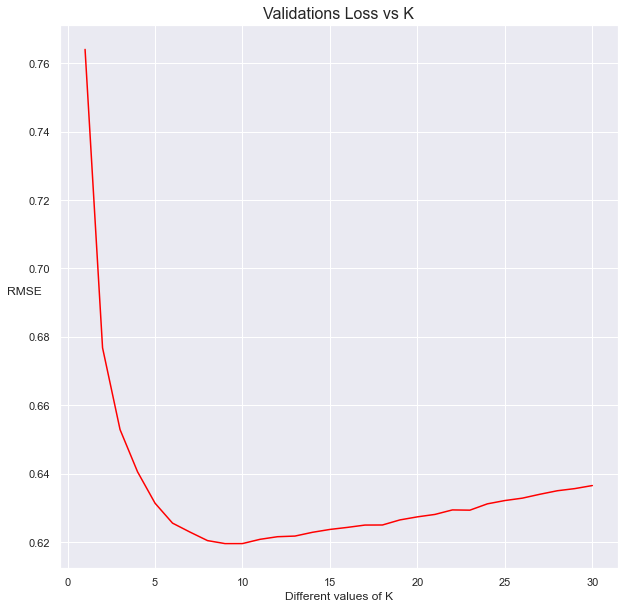

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(rmse_val)+1), rmse_val, color='red')

plt.xlabel('Different values of K', fontsize=12)
plt.ylabel('RMSE', fontsize=12, rotation=0)
plt.grid(True)

plt.title('Validations Loss vs K', fontsize=16)
plt.show()

In [18]:
rmse_val.index((min(rmse_val)))

8

#### 3.B. **HPT with GridSearchCV**

* We set up the parameter grid for values of k of our interest.

* Here we use the values between 1 and 31.

* The object of `GridSearchCV` is instantiated with a `KNeighborsRegressor` estimator along with the parameter grid and number of cross-validation folds equal to 10.

* The grid search is performed by calling the `fit` method with training feature matrix and labels as arguments.

In [19]:
param_grid = {'knn__n_neighbors': list(range(1,31))} 

pipe = Pipeline([('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor())
                ])

In [20]:
gs = GridSearchCV(pipe,param_grid = param_grid,
                  cv =10,
                  n_jobs=1,
                  return_train_score=True) 

gs.fit(X_train,y_train) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             return_train_score=True)

Lets evaluate the best estimator on the test set.

In [22]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=6))])

In [31]:
gs.best_params_

{'knn__n_neighbors': 6}

Making predictions on the test set

In [32]:
y_pred = gs.best_estimator_.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)

0.6255268557053962

#### 3.C. **HPT with RandmizedSearchCV**

In [25]:
param_grid = {'knn__n_neighbors': list(range(1,31))} 

pipe = Pipeline([('scaler',MinMaxScaler()),
                 ('knn',KNeighborsRegressor())
                ]) 

In [26]:
rs = RandomizedSearchCV(pipe, param_distributions=param_grid,
                      n_jobs=1,refit=True, cv=10,
                      return_train_score=True) 

rs.fit(X_train,y_train) 

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('knn', KNeighborsRegressor())]),
                   n_jobs=1,
                   param_distributions={'knn__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30]},
                   return_train_score=True)

Lets evaluate the best estimator on the test set.

In [27]:
rs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=13))])

In [29]:
rs.best_params_

{'knn__n_neighbors': 13}

Making predictions on the test set

In [33]:
y_pred = rs.best_estimator_.predict(X_test)
mean_squared_error(y_test,y_pred,squared=False)

0.6217404460866567

#### 3.D. **GridSearchCV + Polynomial Features**

In addition, we perform polynomial transformation on the features followed by scaling before using it in the nearest neighbor regressor.

In [37]:
params = {'poly__degree': list(range(1, 4))}

pipe = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', MinMaxScaler()),
                 ('knn', KNeighborsRegressor())])

gs_poly = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  cv=10,
                  n_jobs=1)


In [38]:
gs_poly.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=1, param_grid={'poly__degree': [1, 2, 3]})

In [39]:
gs_poly.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])

We evaluate the model with the test set.

In [40]:
y_pred = gs_poly.best_estimator_.predict(X_test)
error = mean_squared_error(y_test, y_pred, squared=False)

print('RMSE value of k is :', error)

RMSE value of k is : 0.6313551708664618
